# Decision Tree Regression
-------------

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

- CRIM - tingkat kejahatan per kapita oleh kota
- ZN - proporsi lahan perumahan yang dizonasi untuk banyak lebih dari 25.000 kaki persegi
- INDUS - proporsi lahan bisnis non-ritel per kota
- CHAS - variabel dummy Sungai Charles (1 jika wilayah berbatasan dengan sungai; 0 jika tidak)
- NOX - konsentrasi oksida nitrat (bagian per 10 juta)
- RM - jumlah rata-rata ruangan per tempat tinggal
- AGE - proporsi unit yang ditempati pemilik yang dibangun sebelum tahun 1940
- DIS - jarak tertimbang ke lima pusat pekerjaan di Boston
- RAD - indeks aksesibilitas ke jalan raya radial
- TAX - tingkat pajak properti nilai penuh per $10.000
- PTRATIO - rasio murid-guru per kota
- B - 1000(Bk - 0.63)^2 di mana Bk adalah proporsi orang kulit hitam per kota
- LSTAT - persentase status sosial rendah penduduk
- MEDV - Nilai median rumah yang ditempati pemilik dalam ribuan dolar.

In [14]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Eksplorasi Data
----------

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Imputasi Mean

In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.head(4))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO   
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3  \
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  


Beberapa fitur dapat dieksplorasi dengan cara berikut.

In [17]:
cdf = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]
cdf.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.000000,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.000000,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.000000,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.000000,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.000000,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2
5,0.02985,0.0,2.18,0.000000,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000,28.7
6,0.08829,12.5,7.87,0.069959,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.430000,22.9
7,0.14455,12.5,7.87,0.000000,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.150000,27.1
8,0.21124,12.5,7.87,0.000000,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.930000,16.5
9,0.17004,12.5,7.87,0.069959,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.100000,18.9


plot-plot fitur diatas

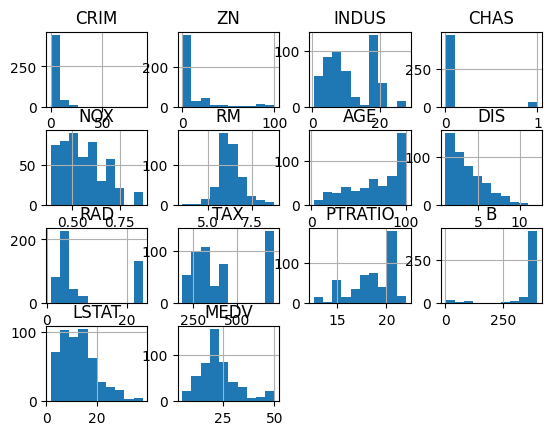

In [18]:
viz = cdf[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]
viz.hist()
plt.show()

Plot fitur-fitur vs emisi dapat dibuat dan dapat dilihat linearitas hubungannya.

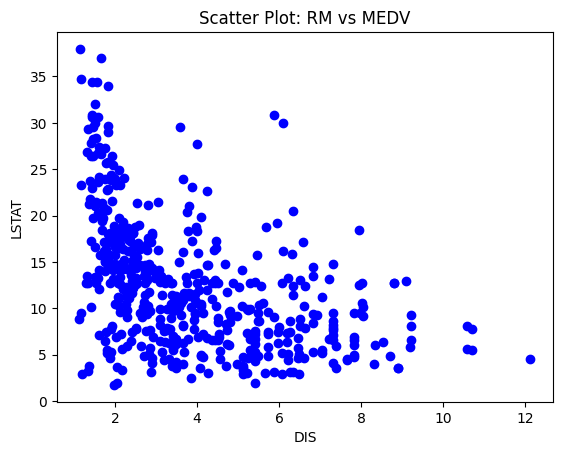

In [19]:
plt.scatter(cdf.DIS, cdf.LSTAT, color='blue')
plt.xlabel("DIS")
plt.ylabel("LSTAT")
plt.title("Scatter Plot: RM vs MEDV")
plt.show()

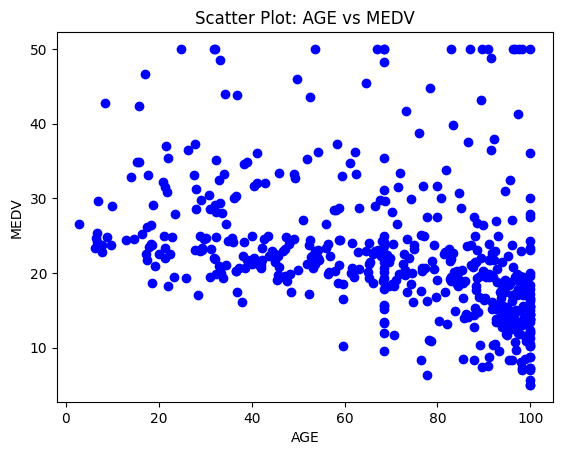

In [20]:
plt.scatter(cdf.AGE, cdf.MEDV, color='blue')
plt.xlabel("AGE")
plt.ylabel("MEDV")
plt.title("Scatter Plot: AGE vs MEDV")
plt.show()

#### Pembuatan Dataset Pelatihan

In [21]:
# Mengambil "LSTAT" sebagai variabel independen (regressor)
X = cdf.iloc[:, 0].values
# Mengambil "MEDV" sebagai variabel dependen
y = cdf.iloc[:, 2].values
# Reshape data karena hanya menggunakan satu fitur "Engine Size"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [22]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Normalisasi atau scaling dataset

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

Pembuatan Model

In [24]:
# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

Prediksi nilai baru dengan model yang telah dibentuk

In [30]:
# Predicting a new result
new_data = np.array([[1.4]])

# Lakukan transformasi menggunakan sc_X
new_data_scaled = sc_X.transform(new_data)

# Lakukan prediksi menggunakan regressor
y_pred_scaled = regressor.predict(new_data_scaled)

# Lakukan reshape pada y_pred_scaled
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Lakukan inverse transformasi menggunakan sc_y
y_pred = sc_y.inverse_transform(y_pred_scaled)

# Cetak hasil prediksi
print(y_pred)

[[8.14]]


Visualisasi Hasil dalam nilai yang discaling:

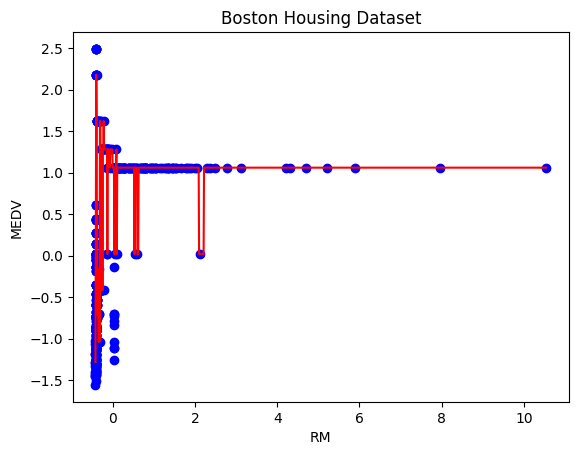

In [26]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_grid, regressor.predict(X_grid), color='red')
plt.title('Boston Housing Dataset')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

Visualisasi Hasil dalam nilai asalnya:

ValueError: Expected 2D array, got 1D array instead:
array=[-1.28427332 -1.28427332 -1.28427332 ...  1.06070318  1.06070318
  1.06070318].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

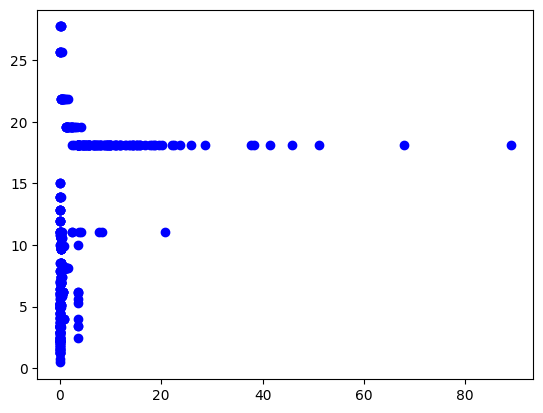

In [27]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((-1, 1))
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color='blue')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='red')
plt.title('Boston Housing Dataset')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

Visualisasi Tree (dengan nilai yang discaling):

In [ ]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import graphviz
from sklearn import tree

# Create DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=['RM'], filled=True)

# Create graph from DOT data
graph = graphviz.Source(dot_data)

# Display graph
graph.render("decision_tree")  # Save the graph as a file (e.g., decision_tree.png)
graph.view()  # Display the graph in a viewer

FileNotFoundError: [Errno 2] No such file or directory: 'decision_tree'

In [ ]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=['Harga rumah berdasarkan ruangan'],  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Evaluasi
--------

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

test_x = np.asanyarray(X_test)
test_y = np.asanyarray(y_test)
test_y_ = regressor.predict(test_x)

# Lakukan inverse transformasi pada data prediksi dan data aktual
test_y = sc_y.inverse_transform(test_y)
test_y_ = sc_y.inverse_transform(test_y_.reshape(-1, 1)).flatten()

# Hitung metrik evaluasi
mae = mean_absolute_error(test_y, test_y_)
mse = mean_squared_error(test_y, test_y_)
r2 = r2_score(test_y, test_y_)

# Cetak hasil metrik evaluasi
print("Mean Absolute Error: %.2f" % mae)
print("Residual Sum of Squares (MSE): %.2f" % mse)
print("R2-score: %.2f" % r2)

Mean Absolute Error: 205.74
Residual Sum of Squares (MSE): 49261.93
R2-score: -6.11


In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(cdf[['RM']])
test_y = np.asanyarray(cdf[['MEDV']])
test_y_ = sc_y.inverse_transform(regressor.predict(sc_X.transform(test_x)))

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.50435498e-01 -7.05716314e-01  1.32087089e+00  1.16914778e+00
  1.47259399e+00  6.59791640e-01  3.12244864e-02  4.86393804e-01
 -6.62366855e-01 -3.26408549e-01 -2.39709631e-01 -2.50546996e-01
  7.45739453e-02 -2.39709631e-01 -7.32809726e-01 -3.37245914e-01
 -7.43647090e-01 -5.53993208e-01 -2.61384361e-01 -4.78131655e-01
 -9.76650432e-01 -2.45128314e-01 -8.03252596e-01 -7.65321820e-01
 -7.59903137e-01 -9.44138338e-01 -7.65321820e-01 -8.46602055e-01
 -2.29623371e-02 -1.74685443e-01 -9.44138338e-01 -8.79114149e-01
 -1.01999989e+00 -1.03083726e+00 -7.32809726e-01 -4.02270102e-01
 -2.83059090e-01 -3.37245914e-01 -2.45128314e-01  8.87376299e-01
  1.33170825e+00  4.32206981e-01  2.91321239e-01  2.42553098e-01
 -1.53010714e-01 -1.90866380e+00 -3.48083278e-01 -6.51529490e-01
 -8.89951514e-01 -3.48083278e-01 -3.15571184e-01 -2.28872267e-01
  2.58809145e-01  8.54113100e-02  7.45739453e-02  1.38589508e+00
  5.28992159e-02  9.74075216e-01  7.45739453e-02 -3.26408549e-01
 -1.52935603e+00 -2.45128314e-01 -4.46370665e-02  2.58809145e-01
  1.12579832e+00 -7.05716314e-01 -3.48083278e-01 -6.63117960e-02
 -5.64830573e-01 -1.85522808e-01 -4.34782196e-01 -1.63848078e-01
  2.03871217e-02  8.54113100e-02  1.61272863e-01 -7.05716314e-01
  1.61272863e-01 -1.96360172e-01 -2.72221725e-01 -2.50546996e-01
  5.83930087e-01  1.39598134e-01  2.37134416e-01 -1.78297898e-01
  1.39598134e-01  5.02649851e-01 -1.21249724e-02 -4.46370665e-02
  1.07086039e-01  6.59791640e-01 -4.34782196e-01 -5.81086620e-01
  3.12244864e-02  2.42553098e-01 -2.18034902e-01  6.27279546e-01
  1.61272863e-01  1.62431710e+00  2.38293263e+00  1.14747305e+00
  5.83930087e-01  4.21369616e-01 -5.81086620e-01 -3.58920643e-01
 -1.78297898e-01 -3.37245914e-01 -3.37245914e-01  9.54975702e-03
 -1.03083726e+00 -2.68609271e-01 -9.88238901e-02  2.03871217e-02
 -4.13107467e-01 -7.32809726e-01 -4.45619561e-01 -4.67294290e-01
 -1.53010714e-01 -3.69758008e-01 -2.39709631e-01 -3.58920643e-01
 -6.63117960e-02 -3.26408549e-01 -1.63848078e-01 -3.69758008e-01
 -4.13107467e-01 -1.31335984e-01 -7.49065773e-01 -6.94878949e-01
 -1.42173349e-01 -9.00788879e-01 -3.69758008e-01 -3.26408549e-01
  4.20618512e-02 -4.56456926e-01 -2.93896455e-01 -4.88969020e-01
 -5.64830573e-01 -6.63117960e-02 -1.00916253e+00 -5.21481114e-01
 -9.33300973e-01 -8.89951514e-01 -9.98325161e-01 -7.59903137e-01
 -9.54975702e-01 -9.54975702e-01 -7.59903137e-01 -8.68276785e-01
 -5.21481114e-01 -7.81577867e-01 -8.79865254e-02 -3.42664596e-01
 -7.92415232e-01 -4.45619561e-01 -9.54975702e-01 -1.50768130e+00
 -1.03083726e+00  2.02529959e+00  1.82947592e-01  2.58809145e-01
  4.75556440e-01  2.96815032e+00  2.38293263e+00  2.96815032e+00
 -6.35273443e-01  2.58809145e-01  2.96815032e+00  1.28760769e-01
  1.28760769e-01 -3.37997018e-02 -5.64830573e-01 -4.13107467e-01
  5.28992159e-02  2.58809145e-01 -1.28760769e-03 -1.26925928e+00
  6.37365806e-02  9.08299924e-02  7.89840016e-01  1.17998515e+00
  1.86273912e+00  1.47259399e+00  1.65682919e+00  1.07161150e+00
  4.10532251e-01  7.57327922e-01  2.96815032e+00 -3.10152502e-01
  1.07161150e+00  1.32087089e+00  1.00116863e+00  8.54864204e-01
  1.49426872e+00  9.19888393e-01  7.03141099e-01  2.96815032e+00
  1.29919616e+00  8.33189475e-01  1.29919616e+00  1.33170825e+00
  1.11496096e+00  1.61272863e-01  2.13367324e+00  2.80558985e+00
  2.96815032e+00  7.45739453e-02 -3.26408549e-01 -1.21249724e-02
  1.93784957e-01 -2.83059090e-01 -1.63848078e-01 -3.42664596e-01
 -2.29623371e-02 -2.39709631e-01  1.17923404e-01  2.58809145e-01
  7.45739453e-02  6.59791640e-01 -1.20498620e-01  4.20618512e-02
  1.00116863e+00 -9.88238901e-02  5.29743263e-01  8.11514746e-01
  2.96815032e+00  2.96815032e+00  1.62431710e+00  9.74075216e-01
  2.61051729e+00  4.86393804e-01 -6.24436079e-01  9.84912581e-01
  2.06864905e+00  2.96815032e+00  6.92303734e-01  1.50435498e-01
  2.69646510e-01  9.63237852e-01  1.17923404e-01  7.03141099e-01
 -6.63117960e-02 -7.32809726e-01 -4.46370665e-02  1.17923404e-01
 -5.43155843e-01 -4.45619561e-01 -1.28760769e-03 -2.68609271e-01
  2.04622322e-01  3.88857522e-01  1.93784957e-01  2.37134416e-01
  7.57327922e-01  2.96815032e+00 -1.28760769e-03 -1.85522808e-01
  2.31790844e+00  2.96815032e+00  1.45091926e+00  8.11514746e-01
  1.21249724e+00  2.22037216e+00  2.83810195e+00  9.09051028e-01
  1.50510609e+00  2.03871217e-02  8.76538934e-01  2.96815032e+00
  2.26372162e+00 -2.07197537e-01 -3.69758008e-01  2.80483875e-01
  1.93784957e-01  1.36422035e+00  1.06077413e+00  1.01742468e+00
  1.14747305e+00  1.13663569e+00  1.17923404e-01  1.35338298e+00
  2.38293263e+00  3.12244864e-02  2.53465573e+00  2.96815032e+00
  1.03909940e+00 -6.63117960e-02 -2.72221725e-01 -3.37997018e-02
  9.08299924e-02  2.37134416e-01  6.38116910e-01  1.59180500e+00
  5.02649851e-01  9.54975702e-03 -2.50546996e-01  6.48954275e-01
  4.86393804e-01 -3.48083278e-01 -1.21249724e-02  1.33170825e+00
  5.29743263e-01 -6.63117960e-02 -2.29623371e-02  1.17998515e+00
  1.46175663e+00  6.27279546e-01  1.16914778e+00  6.05604816e-01
  1.12504722e-01 -2.50546996e-01  2.96815032e+00 -8.79865254e-02
 -3.48083278e-01 -1.09661255e-01  1.28760769e-01 -6.94878949e-01
 -5.21481114e-01 -3.04733820e-01  5.28992159e-02 -1.28760769e-03
 -7.05716314e-01 -2.39709631e-01 -2.39709631e-01 -4.45619561e-01
  2.58809145e-01 -1.42173349e-01 -1.53010714e-01 -4.46370665e-02
 -3.58920643e-01 -4.88969020e-01  1.47259399e+00 -6.94878949e-01
 -3.48083278e-01 -4.46370665e-02 -2.07197537e-01 -1.63848078e-01
 -3.37245914e-01 -4.45619561e-01 -2.18034902e-01 -3.91432737e-01
 -2.45128314e-01  1.09328623e+00  1.93784957e-01  1.39598134e-01
  5.29743263e-01 -5.53993208e-01 -1.55103076e+00  5.28992159e-02
  1.12504722e-01  4.32206981e-01  3.12244864e-02  1.61272863e-01
 -1.85522808e-01 -1.21249724e-02 -4.78131655e-01 -6.02761349e-01
 -5.21481114e-01 -9.88238901e-02  9.54975702e-03 -1.28760769e-03
  2.58809145e-01 -6.89460267e-01 -1.96360172e-01 -2.29623371e-02
 -7.71491607e-02  5.29743263e-01 -7.71491607e-02 -1.16088563e+00
  2.96815032e+00  2.96815032e+00  2.96815032e+00 -4.56456926e-01
 -5.64830573e-01 -9.54975702e-01 -1.16088563e+00 -8.24927326e-01
 -9.44138338e-01 -5.37737161e-01 -1.22590982e+00 -1.34512083e+00
  3.12244864e-02 -1.26925928e+00 -1.22590982e+00 -1.11753617e+00
 -1.49684394e+00 -1.67024177e+00 -5.10643749e-01 -7.92415232e-01
 -1.34512083e+00 -7.59903137e-01 -9.44138338e-01 -8.46602055e-01
 -1.39930766e+00 -1.10669881e+00 -1.07418671e+00 -1.03083726e+00
 -5.81086620e-01 -1.52935603e+00 -1.90866380e+00 -1.76777806e+00
 -1.31335984e-01 -1.67024177e+00 -1.13921090e+00 -2.83059090e-01
 -1.52935603e+00 -1.90866380e+00 -1.16088563e+00 -4.45619561e-01
 -5.86505302e-01  1.01742468e+00 -2.93896455e-01 -9.44138338e-01
 -5.10643749e-01 -6.84041584e-01 -1.69191650e+00 -1.67024177e+00
 -3.10152502e-01 -1.23674718e+00 -1.63848078e-01 -1.54019340e+00
 -6.40692126e-01 -9.11626243e-01 -1.96360172e-01 -9.98325161e-01
 -1.18256036e+00 -1.55103076e+00 -3.37245914e-01 -1.26925928e+00
 -1.10669881e+00 -1.22590982e+00 -1.21249724e-02 -9.22463608e-01
 -7.05716314e-01 -9.00788879e-01 -1.18256036e+00  5.02649851e-01
 -1.41014502e+00 -1.50768130e+00 -7.43647090e-01 -1.06334935e+00
 -1.31260874e+00 -5.97342667e-01 -4.56456926e-01 -7.81577867e-01
 -6.35273443e-01 -1.17172300e+00 -1.67024177e+00 -6.89460267e-01
 -9.22463608e-01 -4.34782196e-01 -9.98325161e-01 -9.44138338e-01
 -7.05716314e-01 -5.21481114e-01 -1.21249724e-02  5.28992159e-02
 -1.07418671e+00 -6.02761349e-01 -8.35764690e-01 -4.46370665e-02
 -6.73204220e-01 -2.39709631e-01 -3.37245914e-01 -2.61384361e-01
 -3.37997018e-02 -2.93896455e-01 -3.91432737e-01 -3.80595373e-01
 -8.79865254e-02 -9.44138338e-01 -1.78297898e-01 -2.68609271e-01
  6.37365806e-02  1.17998515e+00 -1.69191650e+00  1.61272863e-01
 -6.40692126e-01 -1.23674718e+00 -9.22463608e-01 -2.68609271e-01
  2.80483875e-01 -9.98325161e-01  2.58809145e-01 -8.79865254e-02
 -2.18034902e-01 -1.53010714e-01 -3.80595373e-01 -4.13107467e-01
 -8.03252596e-01 -1.69191650e+00 -1.57270549e+00 -6.24436079e-01
 -6.24436079e-01 -8.79865254e-02 -8.79865254e-02 -4.78131655e-01
 -7.59903137e-01 -3.48083278e-01 -1.53010714e-01 -5.53993208e-01
 -6.29854761e-01 -2.29623371e-02 -2.18034902e-01  1.39598134e-01
 -5.37737161e-01 -6.51529490e-01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.